# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from glob import glob
from sklearn.model_selection import train_test_split
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Data Loading

**After importing all necessary modules, I'll load all dataset seperately (each stands for a specific Indian state). Maybe in some states there are far less or more Null values than in others. In that case I would consider to use only some states.**

In [2]:
indians = [pd.read_csv(f) for f in glob('Mortality_*.csv')]

/home/florian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,3,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/florian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,11,14,16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117) have mixed types. Speci

In [3]:
for df in indians:
    print(len(df), df.isnull().sum().sum()/(len(df)*122))

191589 0.26269779682926114
94619 0.31619511486879476
59062 0.30064724981972263
90744 0.29955600189616477
44251 0.2968524190061834
107238 0.29445390198421834
71003 0.28764820142672337
57573 0.31203891396040895
53503 0.23588427552553357


**Apparently, there are no dataframes (indian states) with far more or far less None values than others. Thus I will work with all of them and now concatenate all of those dataframes into one single dataframe ('indians'). Furthermore I will change None values to -1.**

In [4]:
indians = pd.concat(indians).reset_index()

In [5]:
indians.head()


,index,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,psu_id,m_serial_no,deceased_sex,date_of_death,month_of_death,year_of_death,age_of_death_below_one_month,age_of_death_below_eleven_month,age_of_death_above_one_year,treatment_source,place_of_death,is_death_reg,is_death_certificate_received,serial_num_of_infant_mother,order_of_birth,death_symptoms,is_death_associated_with_pregnan,death_period,months_of_pregnancy,factors_contributing_death,factors_contributing_death_2,symptoms_of_death,time_between_onset_of_complicati,nearest_medical_facility,m_expall_status,field38,hh_id,client_hh_id,currently_dead_or_out_migrated,hh_serial_no,sex,usual_residance,relation_to_head,member_identity,father_serial_no,mother_serial_no,date_of_birth,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,currently_attending_school,reason_for_not_attending_school,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,symptoms_pertaining_illness,sought_medical_care,diagnosed_for,diagnosis_source,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,hh_expall_status,client_hl_id,serial_no,building_no,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,water_filteration,toilet_used,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,hl_expall_status,fid,isdeadmigrated,residancial_status,iscoveredbyhealthscheme,healthscheme_1,healthscheme_2,housestatus,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,0,712232,375,NaN,2944,63,3,9,58,1.0,1,100270529,4,1,10.0,11,2008.0,0,0,80,0,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,13141,NaN,2,1,1,1,1,314,NaN,NaN,0,0,1966,43,1,3,3,0,5,1990,NaN,NaN,4,7,0,0,0,11,NaN,0,0,NaN,0,7,4,4,0,1,NaN,77,0,1,1,1,3,2,NaN,0,NaN,1,1,3,2,4,2,2,3,2,2,2,2,1,2,2,2,1,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9441e+10,-0.630351,68.37,NaN,4,1,NaN
1,1,712240,383,NaN,2997,28,1,9,58,1.0,1,100269231,5,1,13.0,12,2007.0,0,0,70,9,3,1.0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,13325,NaN,2,1,2,1,1,104,NaN,NaN,0,0,1939,70,1,3,5,0,0,1952,NaN,NaN,0,16,0,0,3,5,2,21,8,2,8,5,4,4,0,1,NaN,32,0,1,1,1,3,2,NaN,0,NaN,2,2,2,2,2,2,2,3,4,2,2,2,2,2,2,2,1,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9971e+10,-4.36921,68.37,NaN,4,1,NaN
2,2,109886,246,NaN,NaN,58,1,9,62,1.0,2,100281885,1,1,30.0,7,2011.0,0,0,87,0,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,40051,NaN,2,2,2,1,1,277,NaN,NaN,6,12,1954,57,1,1,3,0,6,1974,NaN,NaN,3,2,0,0,0,99,NaN,0,0,NaN,0,7,4,4,0,1,NaN,62,0,1,1,1,3,2,NaN,0,NaN,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,1,9.620340e+11,NaN,1,2,0,0,1,1,1,9.62034e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,3,712216,359,NaN,2706,196,1,9,58,1.0,1,100268481,38,2,0.0,5,2009.0,0,0,90,9,1,1.0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,12090,NaN,2,1,1,1,1,876,NaN,NaN,0,0,1959,50,1,3,5,0,4,1970,NaN,NaN,0,3,0,0,0,11,NaN,0,0,NaN,0,1,1,1,0,1,NaN,228,0,1,1,1,3,2,NaN,0,NaN,2,2,3,3,1,2,2,3,4,2,2,2,1,2,2,2,2,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7061e+10,-2.99654,68.37,NaN,4,1,NaN
4,4,712224,367,NaN,2777,253,1,9,58,1.0,1,100268463,41,2,0.0,5,2008.0,6,0,0,0,1,2.0,0,2,3,3,0,0,0,0,0,0,0,0,NaN,NaN,12440,NaN,2,1,2,1,1,1218,NaN,NaN,0,0,1944,65,1,3,5,0,0,1954,NaN,NaN,0,15,0,0,0,4,2,19,8,2,8,7,4,4,0,1,NaN,299,0,1,1,1,3,2,NaN,0,NaN,2,2,2,1,4,2,2,3,2,2,2,2,1,2,2,2,2,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7771e+10,-3.95114,68.37,NaN,4,1,NaN


In [6]:
indians.isnull().sum()

index                                    0
id                                       0
m_id                                 49692
client_m_id                         365714
hl_id                               279471
house_no                                 0
house_hold_no                            0
state                                    0
district                                 0
rural                                   12
stratum_code                             0
psu_id                                   0
m_serial_no                          35023
deceased_sex                             0
date_of_death                         4921
month_of_death                         488
year_of_death                           31
age_of_death_below_one_month        593900
age_of_death_below_eleven_month     634014
age_of_death_above_one_year         118694
treatment_source                     20604
place_of_death                       10535
is_death_reg                         10473
is_death_ce

In [7]:
indians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: float64(9), int64(11), object(103)
memory usage: 722.2+ MB


In [8]:
indians.fillna(-1, inplace=True)

In [9]:
indians.replace(' ', -1, inplace=True)

In [10]:
indians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: float64(9), int64(12), object(102)
memory usage: 722.2+ MB


In [11]:
sum(indians.age == -1)

12305

## Creating Target Variable

**The most important columns are those I will be able to use for calculating the age a person in the dataset died. There is an age column, but it is not not very precise. Thus, I will analyse the columns 'date_of_death', 'month_of_death', 'year_of_death','date_of_birth', 'month_of_birth' and 'year_of_birth'. Dates that are higher than 31 or less than 1, months that are higher than 12 or lower than 1 and years that are higher than 2013 or lower than lets say 1870 must be wrong. I flag them as None (-1).**

In [12]:
indians['date_of_death']

0         10.0
1         13.0
2         30.0
3          0.0
4          0.0
5          0.0
6         25.0
7         27.0
8          0.0
9         13.0
10         6.0
11         0.0
12         0.0
13        26.0
14        16.0
15         8.0
16        13.0
17         0.0
18         0.0
19        16.0
20         0.0
21         0.0
22        18.0
23         0.0
24         7.0
25        26.0
26        21.0
27        20.0
28         0.0
29         0.0
30        15.0
31         0.0
32        25.0
33         9.0
34         9.0
35         7.0
36        26.0
37         4.0
38         0.0
39        11.0
40         6.0
41         7.0
42         0.0
43         0.0
44         0.0
45         0.0
46         0.0
47         0.0
48         6.0
49         0.0
50         0.0
51         0.0
52        21.0
53         0.0
54        25.0
55         0.0
56         8.0
57         7.0
58         0.0
59         0.0
60        17.0
61         0.0
62         8.0
63        26.0
64         8.0
65         2.0
66        

In [13]:
indians['month_of_death']

0         11
1         12
2          7
3          5
4          5
5          2
6          8
7          8
8          1
9          2
10        11
11        10
12        11
13         2
14        12
15         2
16         3
17         9
18         8
19         5
20         4
21         6
22        12
23         6
24         4
25        10
26        12
27         6
28        10
29         5
30        10
31         8
32        12
33         7
34         5
35         8
36         5
37         2
38        12
39         3
40        12
41         1
42         8
43         1
44         2
45        10
46         3
47        11
48         8
49         3
50        10
51         0
52        11
53         3
54        12
55         1
56        10
57         1
58         3
59         7
60         7
61         4
62         9
63         7
64         1
65         2
66         7
67        10
68         2
69        10
70         5
71         4
72         1
73         6
74         4
75         4
76        11

In [14]:
indians2 = indians.astype(int, errors='ignore', inplace=True)

In [15]:
indians2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: int64(21), object(102)
memory usage: 722.2+ MB


In [16]:
for col in ['month_of_death','month_of_birth','date_of_death','date_of_birth','year_of_death','year_of_birth']:
    indians2[col] = pd.to_numeric(indians2[col])

In [17]:
indians2[indians2['month_of_death']<13]['month_of_death'].value_counts()

 8.0     73639
 1.0     69222
 12.0    65552
 10.0    63559
 11.0    62577
 6.0     61771
 7.0     59965
 2.0     58486
 9.0     57615
 5.0     55490
 3.0     53737
 4.0     52506
 0.0     34574
-1.0       489
Name: month_of_death, dtype: int64

In [18]:
indians2['month_of_birth'].value_counts()

 0.0     491136
 6.0      29950
 4.0      28262
 5.0      27367
 7.0      26394
 3.0      24483
 1.0      24026
 2.0      22536
 8.0      22375
 9.0      17397
 10.0     17322
 12.0     13182
 11.0     12809
-1.0      12343
Name: month_of_birth, dtype: int64

In [19]:
indians2[['month_of_death','month_of_birth']] = indians2[['month_of_death','month_of_birth']].applymap(lambda x: -1 if x == 0 or x > 12 else x)

In [20]:
indians2['month_of_death'].value_counts()

 8.0     73639
 1.0     69222
 12.0    65552
 10.0    63559
 11.0    62577
 6.0     61771
 7.0     59965
 2.0     58486
 9.0     57615
 5.0     55490
 3.0     53737
 4.0     52506
-1.0     35463
Name: month_of_death, dtype: int64

In [21]:
indians2['month_of_birth'].value_counts()

-1.0     503479
 6.0      29950
 4.0      28262
 5.0      27367
 7.0      26394
 3.0      24483
 1.0      24026
 2.0      22536
 8.0      22375
 9.0      17397
 10.0     17322
 12.0     13182
 11.0     12809
Name: month_of_birth, dtype: int64

In [22]:
indians2['date_of_death'].value_counts()

 0      367973
 10      20471
 15      17913
 1       17533
 20      17415
 12      16229
 5       16128
 2       15749
 25      14253
 8       14105
 6       13485
 4       13442
 7       13217
 3       13215
 11      13188
 9       13059
 14      12945
 17      12300
 18      12072
 28      11796
 13      11747
 16      11679
 22      11607
 26      10934
 21      10819
 24      10178
 27      10115
 19       9680
 23       9440
 29       8638
 30       8406
-1        4921
 31       4889
 80          5
 60          5
 70          5
 90          3
 50          3
 110         3
 40          2
 91          2
 71          2
 32          1
 75          1
 88          1
 76          1
 61          1
 68          1
 55          1
 52          1
 45          1
 41          1
 51          1
Name: date_of_death, dtype: int64

In [23]:
indians2[['date_of_death','date_of_birth']] = indians2[['date_of_death','date_of_birth']].applymap(lambda x: -1 if x == 0 or x > 31 else x)

In [24]:
indians2['date_of_birth'].value_counts()

-1.0     629202
 1.0      13951
 15.0      9361
 10.0      8876
 12.0      8460
 5.0       6086
 20.0      5995
 2.0       5778
 11.0      5647
 18.0      4554
 17.0      4491
 3.0       4487
 4.0       4449
 25.0      4411
 7.0       4388
 16.0      4120
 6.0       4109
 21.0      4076
 14.0      4056
 8.0       3727
 13.0      3451
 22.0      3278
 9.0       3267
 19.0      3090
 24.0      2610
 28.0      2535
 27.0      2431
 26.0      2244
 30.0      2022
 23.0      2019
 29.0      1358
 31.0      1053
Name: date_of_birth, dtype: int64

In [25]:
indians2['date_of_death'].value_counts()

-1     372935
 10     20471
 15     17913
 1      17533
 20     17415
 12     16229
 5      16128
 2      15749
 25     14253
 8      14105
 6      13485
 4      13442
 7      13217
 3      13215
 11     13188
 9      13059
 14     12945
 17     12300
 18     12072
 28     11796
 13     11747
 16     11679
 22     11607
 26     10934
 21     10819
 24     10178
 27     10115
 19      9680
 23      9440
 29      8638
 30      8406
 31      4889
Name: date_of_death, dtype: int64

In [26]:
indians.dtypes

index                                 int64
id                                    int64
m_id                                 object
client_m_id                          object
hl_id                                object
house_no                              int64
house_hold_no                         int64
state                                 int64
district                              int64
rural                               float64
stratum_code                          int64
psu_id                                int64
m_serial_no                          object
deceased_sex                          int64
date_of_death                       float64
month_of_death                       object
year_of_death                       float64
age_of_death_below_one_month         object
age_of_death_below_eleven_month      object
age_of_death_above_one_year          object
treatment_source                     object
place_of_death                       object
is_death_reg                    

In [27]:
indians2['year_of_death'].value_counts()

 2008    163908
 2007    162596
 2009    162213
 2011    145845
 2010    132397
 2012      2316
 8           92
 7           78
 9           57
-1           31
 2006        19
 2005        13
 2002         4
 2003         3
 209          2
 200          2
 1007         1
 2001         1
 201          1
 2209         1
 2013         1
 2004         1
Name: year_of_death, dtype: int64

In [28]:
indians2['year_of_birth'].value_counts()

 1969.0    50646
 1964.0    47746
 1974.0    46063
 1949.0    40913
 1959.0    38951
 1979.0    36448
 1954.0    36272
 1944.0    28784
 1939.0    20881
 1971.0    20180
 1977.0    18812
 1984.0    18569
 1967.0    18183
 1961.0    17776
 1981.0    16994
 1957.0    14911
 1973.0    13706
-1.0       12308
 1972.0    10850
 1975.0    10639
 1983.0    10552
 1963.0    10128
 1982.0    10023
 1951.0     9785
 1970.0     9517
 1976.0     9344
 1965.0     9272
 1947.0     9224
 1962.0     9109
 1960.0     8826
 1966.0     8387
 1934.0     7979
 1980.0     7816
 1953.0     7441
 1955.0     7328
 1968.0     7226
 1985.0     7185
 1956.0     6988
 1987.0     6888
 1958.0     6621
 1978.0     6337
 1929.0     5663
 1952.0     5610
 1986.0     5314
 1950.0     5105
 1941.0     4567
 1989.0     4106
 1945.0     4067
 1946.0     3831
 1948.0     3795
 1937.0     3123
 1943.0     3087
 1988.0     2696
 1942.0     2561
 1940.0     2470
 1924.0     1831
 1991.0     1478
 1935.0     1380
 1990.0     12

In [29]:
indians2[['year_of_death','year_of_birth']] = indians2[['year_of_death','year_of_birth']].applymap(lambda x: -1 if x < 1870 or x > 2013 else x)

In [30]:
indians2['year_of_death'].value_counts()

 2008    163908
 2007    162596
 2009    162213
 2011    145845
 2010    132397
 2012      2316
-1          265
 2006        19
 2005        13
 2002         4
 2003         3
 2013         1
 2004         1
 2001         1
Name: year_of_death, dtype: int64

In [31]:
indians2.drop(indians2[(indians2.year_of_death == -1) | (indians2.year_of_birth == -1) | \
                       (indians2.month_of_death == -1) | (indians2.month_of_birth == -1) | \
                      (indians2.date_of_death == -1) | (indians2.date_of_birth == -1)].index).shape[0]

99356

In [32]:
indians2.drop(indians2[(indians2.year_of_death == -1) | (indians2.year_of_birth == -1) | \
                                  (indians2.month_of_death == -1) | (indians2.month_of_birth == -1)].index).shape[0]

255849

**If I'd delete all rows that have a None value in any of the columns needed for calculating the age of death, only about 99'000 rows would be left. Instead I decided that I'll do a compromise: In columns the 'age_of_death' or 'age_of_birth' column is not present I'll ignore both of them and only use the columns describing year and month of death/birth. In cases the 'year_of_death', 'year_of_birth', 'month_of_death' and 'month_of_birth' columns are missing, I'll instead use the 'age' column. This means the resulting column will be as precise as possible, but we will still not loose too many columns. Next I'll create a new column describing how many months each person lived before he died.**

In [33]:
indians2.year_of_death.value_counts()

 2008    163908
 2007    162596
 2009    162213
 2011    145845
 2010    132397
 2012      2316
-1          265
 2006        19
 2005        13
 2002         4
 2003         3
 2013         1
 2004         1
 2001         1
Name: year_of_death, dtype: int64

In [34]:
indians2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: float64(4), int64(21), object(98)
memory usage: 722.2+ MB


In [35]:
indians2[['month_of_death','year_of_death','date_of_death','month_of_birth','year_of_birth','date_of_birth','age']] = \
indians2[['month_of_death','year_of_death','date_of_death','month_of_birth','year_of_birth','date_of_birth','age']].astype(int)

In [36]:
indians2.year_of_birth.value_counts()

 1969    50646
 1964    47746
 1974    46063
 1949    40913
 1959    38951
 1979    36448
 1954    36272
 1944    28784
 1939    20881
 1971    20180
 1977    18812
 1984    18569
 1967    18183
 1961    17776
 1981    16994
 1957    14911
 1973    13706
-1       12308
 1972    10850
 1975    10639
 1983    10552
 1963    10128
 1982    10023
 1951     9785
 1970     9517
 1976     9344
 1965     9272
 1947     9224
 1962     9109
 1960     8826
 1966     8387
 1934     7979
 1980     7816
 1953     7441
 1955     7328
 1968     7226
 1985     7185
 1956     6988
 1987     6888
 1958     6621
 1978     6337
 1929     5663
 1952     5610
 1986     5314
 1950     5105
 1941     4567
 1989     4106
 1945     4067
 1946     3831
 1948     3795
 1937     3123
 1943     3087
 1988     2696
 1942     2561
 1940     2470
 1924     1831
 1991     1478
 1935     1380
 1990     1295
 1938     1259
 1931     1210
 1936     1196
 1933      966
 1919      888
 1930      699
 1932      658
 1927     

In [37]:
def calc_lifetime(row):
    if row.month_of_death != -1 and row.year_of_death != -1 and row.date_of_death != -1 and row.month_of_birth != -1 and row.year_of_birth != -1 and row.date_of_birth != -1:
        
        lifetime = ((row.year_of_death*365 + row.month_of_death*30.44 + row.date_of_death)\
                   - (row.year_of_birth*365 + row.month_of_birth*30.44 + row.date_of_birth))/365
        
    elif row.month_of_death != -1 and row.year_of_death != -1 and row.month_of_birth != -1 and row.year_of_birth != -1:
        
        lifetime = ((row.year_of_death*365 + row.month_of_death*30.44)\
                    - (row.year_of_birth*365 + row.month_of_birth*30.44))/365
        
    elif row.age != -1:
        
        lifetime = row.age
        
    elif row.year_of_death != -1 and row.year_of_birth != -1:
        
        lifetime = row.year_of_death - row.year_of_birth
    
    else:
        lifetime = -1
        
    if lifetime < 0 and lifetime != -1:
        lifetime = -1
        
    return lifetime
        

In [38]:
indians2['lifetime'] = indians2.apply(calc_lifetime, axis=1)

**Rows that have a -1 (None) in the lifetime column are not usefull as it's the row this project aims to predict. Thus I'll drop those rows.**

In [39]:
indians2 = indians2[indians2.lifetime != -1]

In [40]:
indians2.shape

(757268, 124)

## Flaging wrong values

**According to the documentation about the data, there are only 2 possible values in the 'rural' column, 1 for "rural" and 2 for "urban". Unfortunately, there are many more values which must be wrong. For similar reasons the 'chew','smoke' and 'alcohol' columns have values that must be wrong. I will replace them with -1 to signify that they are wrong.**

In [41]:
indians2.rural.value_counts()

 1      634700
 2      112252
 42        184
 46        181
 45        174
 47        169
 29        169
 23        169
 27        167
 26        166
 36        165
 38        160
 49        159
 41        154
 54        152
 43        152
 40        150
 44        150
 50        148
 52        147
 48        147
 53        144
 34        142
 35        142
 28        142
 51        141
 37        138
 33        138
 25        136
 39        134
 24        133
 10        132
 30        132
 31        130
 20        129
 13        129
 12        125
 57        125
 55        124
 32        124
 22        121
 56        114
 14        114
 19        113
 18        113
 9         110
 16        106
 8         106
 15        105
 11        103
 5         101
 61        100
 60         96
 21         96
 4          95
 3          95
 6          92
 58         86
 7          82
 17         80
 62         76
 63         73
 66         72
 71         68
 59         67
 64         62
 67       

In [42]:
indians2.chew.value_counts()

7.0    286507
5.0    161095
7       73786
1.0     54549
3.0     49902
5       29711
2.0     27892
-1      27234
3       19438
4.0      7145
6.0      5205
0.0      4243
1        4077
0        1988
2        1729
4        1437
6        1316
9          13
9.0         1
Name: chew, dtype: int64

In [43]:
indians2[['rural']] = indians2[['rural']].applymap(lambda x: x if x == 1 or x == 2 else -1)
indians2[['chew']] = indians2[['chew']].applymap(lambda x: -1 if x == 9.0 or x == '9' else x)
indians2[['smoke']] = indians2[['smoke']].applymap(lambda x: -1 if x == 5.0 or x == '5' else x)
indians2[['alcohol']] = indians2[['alcohol']].applymap(lambda x: -1 if x == 6.0 or x == '6' else x)

## Dealing with None values

**In order to get an overview of the proportion of None values in each column, I'll create a horizontal barplot.**

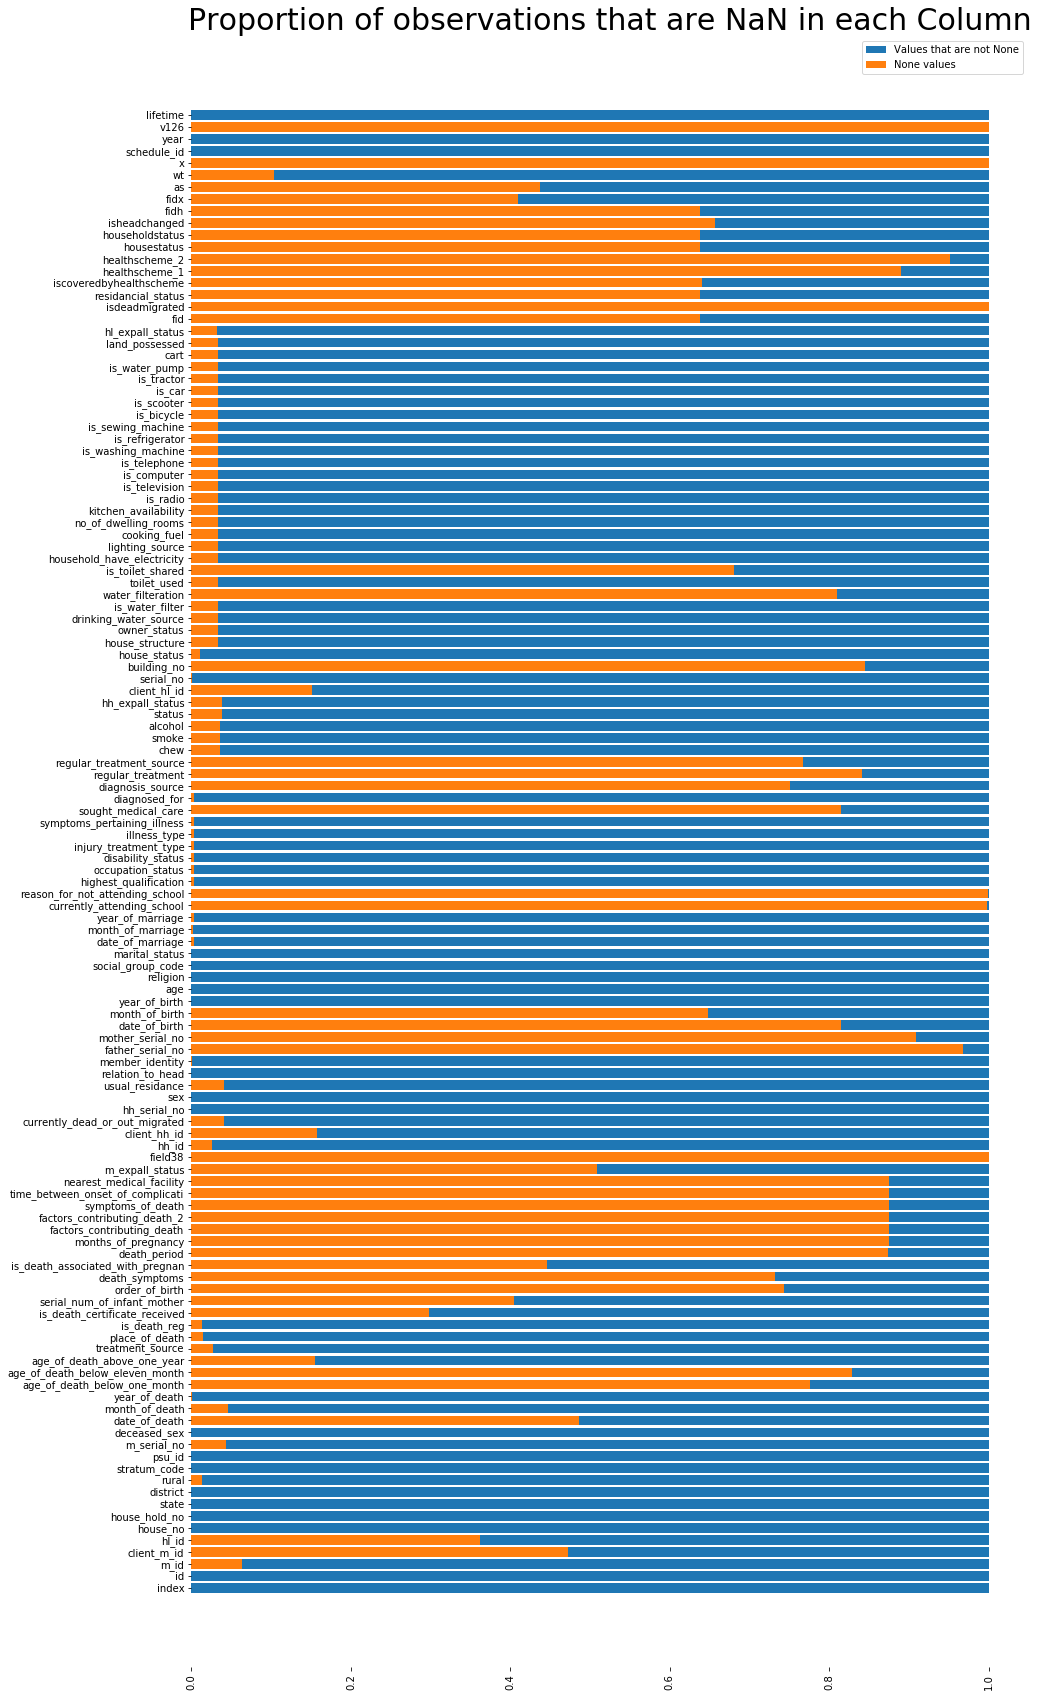

In [44]:
def nan_plot(df):
    none = df == -1
    nanpercentage = none.apply(sum, axis=0)/df.shape[0]
    plt.figure(figsize=(15,30))
    plt.xticks(rotation='vertical')
    plt.barh(nanpercentage.index, 1, label='Values that are not None')
    plt.barh(nanpercentage.index, nanpercentage, label='None values')
    plt.legend()
    sns.despine(bottom=True, left=True)
    plt.title('Proportion of observations that are NaN in each Column', size=30)

nan_plot(indians2)


**As we see, some columns have no or almost no values that are not None. I will drop those columns.**

In [45]:
indians2 = indians2.drop(['v126','x','isdeadmigrated','reason_for_not_attending_school','currently_attending_school'\
                          ,'field38'], axis=1)

**Other columns are directly connected with the death of a person. We can not know them when predicting the age of death of somebody that didn't die yet. Thus I hereby delete those columns.**

In [46]:
indians2 = indians2.drop(['diagnosis_source','diagnosed_for','sought_medical_care',\
                          'nearest_medical_facility','time_between_onset_of_complicati',\
                          'symptoms_of_death','factors_contributing_death_2','factors_contributing_death',\
                          'months_of_pregnancy','death_period','is_death_associated_with_pregnan','death_symptoms',\
                          'is_death_certificate_received','is_death_reg','place_of_death','treatment_source',\
                          'age_of_death_above_one_year','age_of_death_below_eleven_month','age_of_death_below_one_month',\
                          'symptoms_pertaining_illness','injury_treatment_type','illness_type'], axis=1)

In [47]:
indians2.head()

,index,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,psu_id,m_serial_no,deceased_sex,date_of_death,month_of_death,year_of_death,serial_num_of_infant_mother,order_of_birth,m_expall_status,hh_id,client_hh_id,currently_dead_or_out_migrated,hh_serial_no,sex,usual_residance,relation_to_head,member_identity,father_serial_no,mother_serial_no,date_of_birth,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,highest_qualification,occupation_status,disability_status,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,hh_expall_status,client_hl_id,serial_no,building_no,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,water_filteration,toilet_used,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,hl_expall_status,fid,residancial_status,iscoveredbyhealthscheme,healthscheme_1,healthscheme_2,housestatus,householdstatus,isheadchanged,fidh,fidx,as,wt,schedule_id,year,lifetime
0,0,712232,375,-1,2944,63,3,9,58,1,1,100270529,4,1,10,11,2008,0,0,-1,13141,-1,2,1,1,1,1,314,-1,-1,-1,-1,1966,43,1,3,3,0,5,1990,4,7,0,-1,0,7,4,4,0,1,-1,77,0,1,1,1,3,2,-1,0,-1,1,1,3,2,4,2,2,3,2,2,2,2,1,2,2,2,1,4,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.9441e+10,-0.630351,68.37,4,1,43.000000
1,1,712240,383,-1,2997,28,1,9,58,1,1,100269231,5,1,13,12,2007,0,0,-1,13325,-1,2,1,2,1,1,104,-1,-1,-1,-1,1939,70,1,3,5,0,0,1952,0,16,0,2,8,5,4,4,0,1,-1,32,0,1,1,1,3,2,-1,0,-1,2,2,2,2,2,2,2,3,4,2,2,2,2,2,2,2,1,4,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.9971e+10,-4.36921,68.37,4,1,70.000000
2,2,109886,246,-1,-1,58,1,9,62,1,2,100281885,1,1,30,7,2011,0,0,-1,40051,-1,2,2,2,1,1,277,-1,-1,6,12,1954,57,1,1,3,0,6,1974,3,2,0,-1,0,7,4,4,0,1,-1,62,0,1,1,1,3,2,-1,0,-1,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,1,962034005801,1,2,0,0,1,1,1,9.62034e+13,-1,-1,20.95,4,3,56.648767
3,3,712216,359,-1,2706,196,1,9,58,1,1,100268481,38,2,-1,5,2009,0,0,-1,12090,-1,2,1,1,1,1,876,-1,-1,-1,-1,1959,50,1,3,5,0,4,1970,0,3,0,-1,0,1,1,1,0,1,-1,228,0,1,1,1,3,2,-1,0,-1,2,2,3,3,1,2,2,3,4,2,2,2,1,2,2,2,2,4,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.7061e+10,-2.99654,68.37,4,1,50.000000
4,4,712224,367,-1,2777,253,1,9,58,1,1,100268463,41,2,-1,5,2008,2,3,-1,12440,-1,2,1,2,1,1,1218,-1,-1,-1,-1,1944,65,1,3,5,0,0,1954,0,15,0,2,8,7,4,4,0,1,-1,299,0,1,1,1,3,2,-1,0,-1,2,2,2,1,4,2,2,3,2,2,2,2,1,2,2,2,2,4,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.7771e+10,-3.95114,68.37,4,1,65.000000


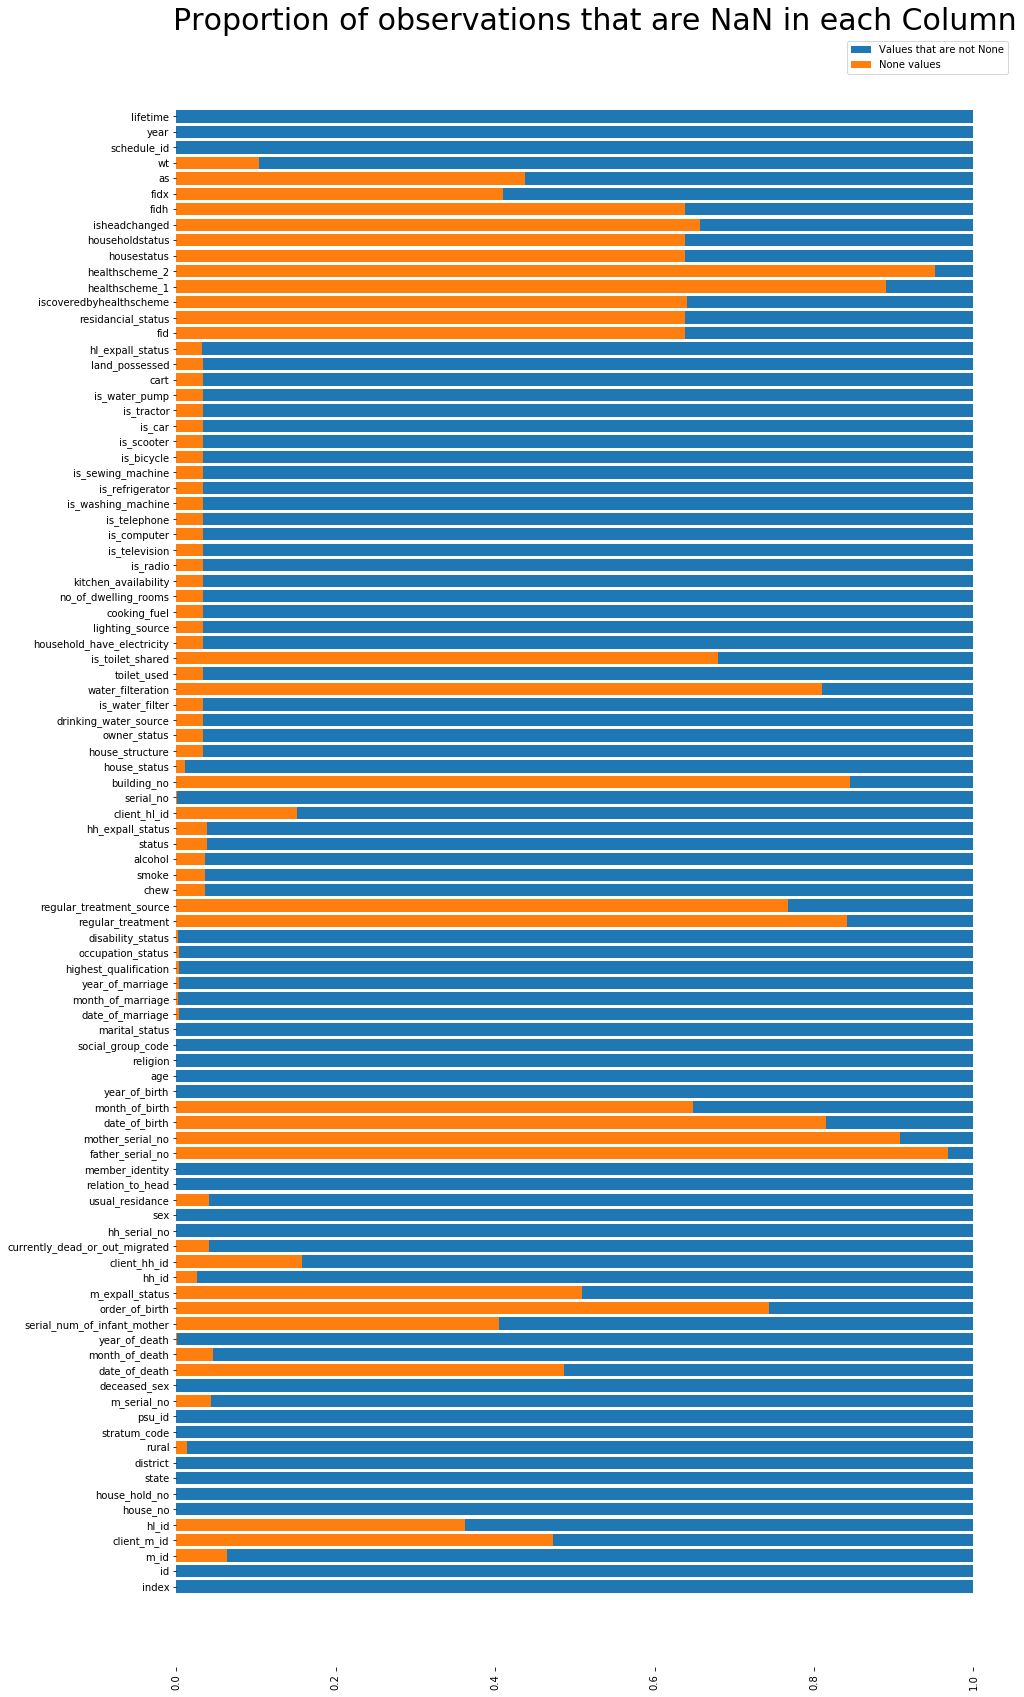

In [48]:
nan_plot(indians2)

**Many columns consist of only serial numbers/ids or I wasn't able to find out what those columns are about. I will drop them. Furthermore I'll drop the 'age', 'month_of_death', 'year_of_death', 'date_of_death', 'month_of_birth', 'year_of_birth', 'date_of_birth' columns which I don't need anymore.**

In [49]:
indians2 = indians2.drop(['schedule_id','fidx','fidh','fid','building_no','serial_no','client_hl_id',\
                          'hh_expall_status','status','mother_serial_no','father_serial_no','client_hh_id',\
                          'hh_serial_no','m_expall_status','serial_num_of_infant_mother','m_serial_no',\
                          'psu_id','stratum_code','house_hold_no','house_no','hl_id','client_m_id','m_id','hh_id',\
                          'id','index','hl_expall_status','member_identity','month_of_death','year_of_death',\
                          'date_of_death','month_of_birth','year_of_birth','date_of_birth','age'],axis=1)

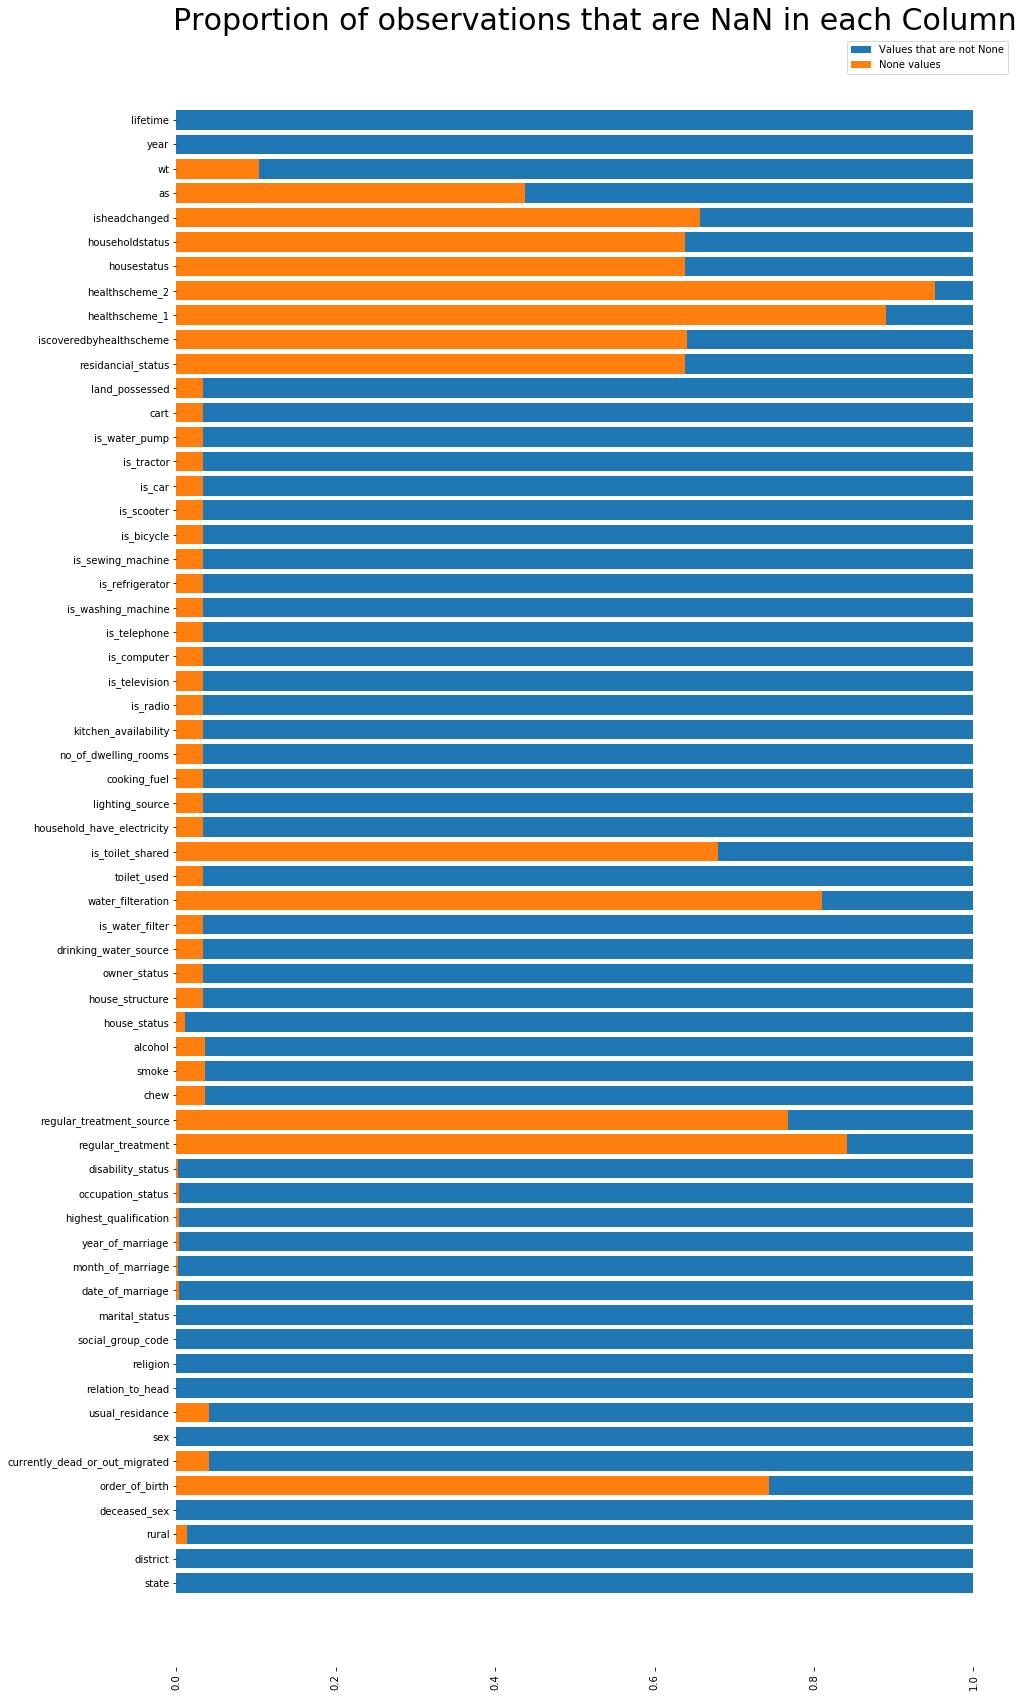

In [50]:
nan_plot(indians2)

## Droping not useful columns

**Some columns are not directly connected to the death of a person, but still can't be used, because they are connected to the age of a person. As the observations are not people at the same age or at random ages, but people how they were as they died, those columns need to be deleted. (As the life expectancy of a person strongly correlates with the age of a person).**

**For example, the 'smoke' column is useless, as smoking is strongly connected to ones age. An Ex-smoker for example is likely older than somebody who never smoked. An ex-smoker has a lower life expectancy than somebody that never smoked, yet this dataset suggests that an ex smoker dies statistically later than somebody who never smoked.**

**Therefore I need to delete all columns that obviously correlate to the age of a person.**

**Furthermore, there is a 'sex' column and a 'deceased_sex' column. Unfortunately I was not able to find out which column is about the sex of the deceased and what's the meaning of the other column. Both have the unique values 'male' and 'female', but the difference between the two columns is, in which rows which of the two values are. The only clue is the following: The proportion of female/male in the deceased_sex column is very similar to the same proportion in the indian population in general. This isn't the case for the 'sex' column. For that reason I assume the 'deceased_sex' column is about the sex of the deceased. But unfortunately this means that I don't know what the sex column is about, so I need to drop it.**

In [51]:
indians2 = indians2.drop(['healthscheme_1','healthscheme_2','iscoveredbyhealthscheme','residancial_status','alcohol'\
                          ,'smoke','chew','occupation_status', 'marital_status','disability_status'\
                          ,'highest_qualification','sex'],axis=1)

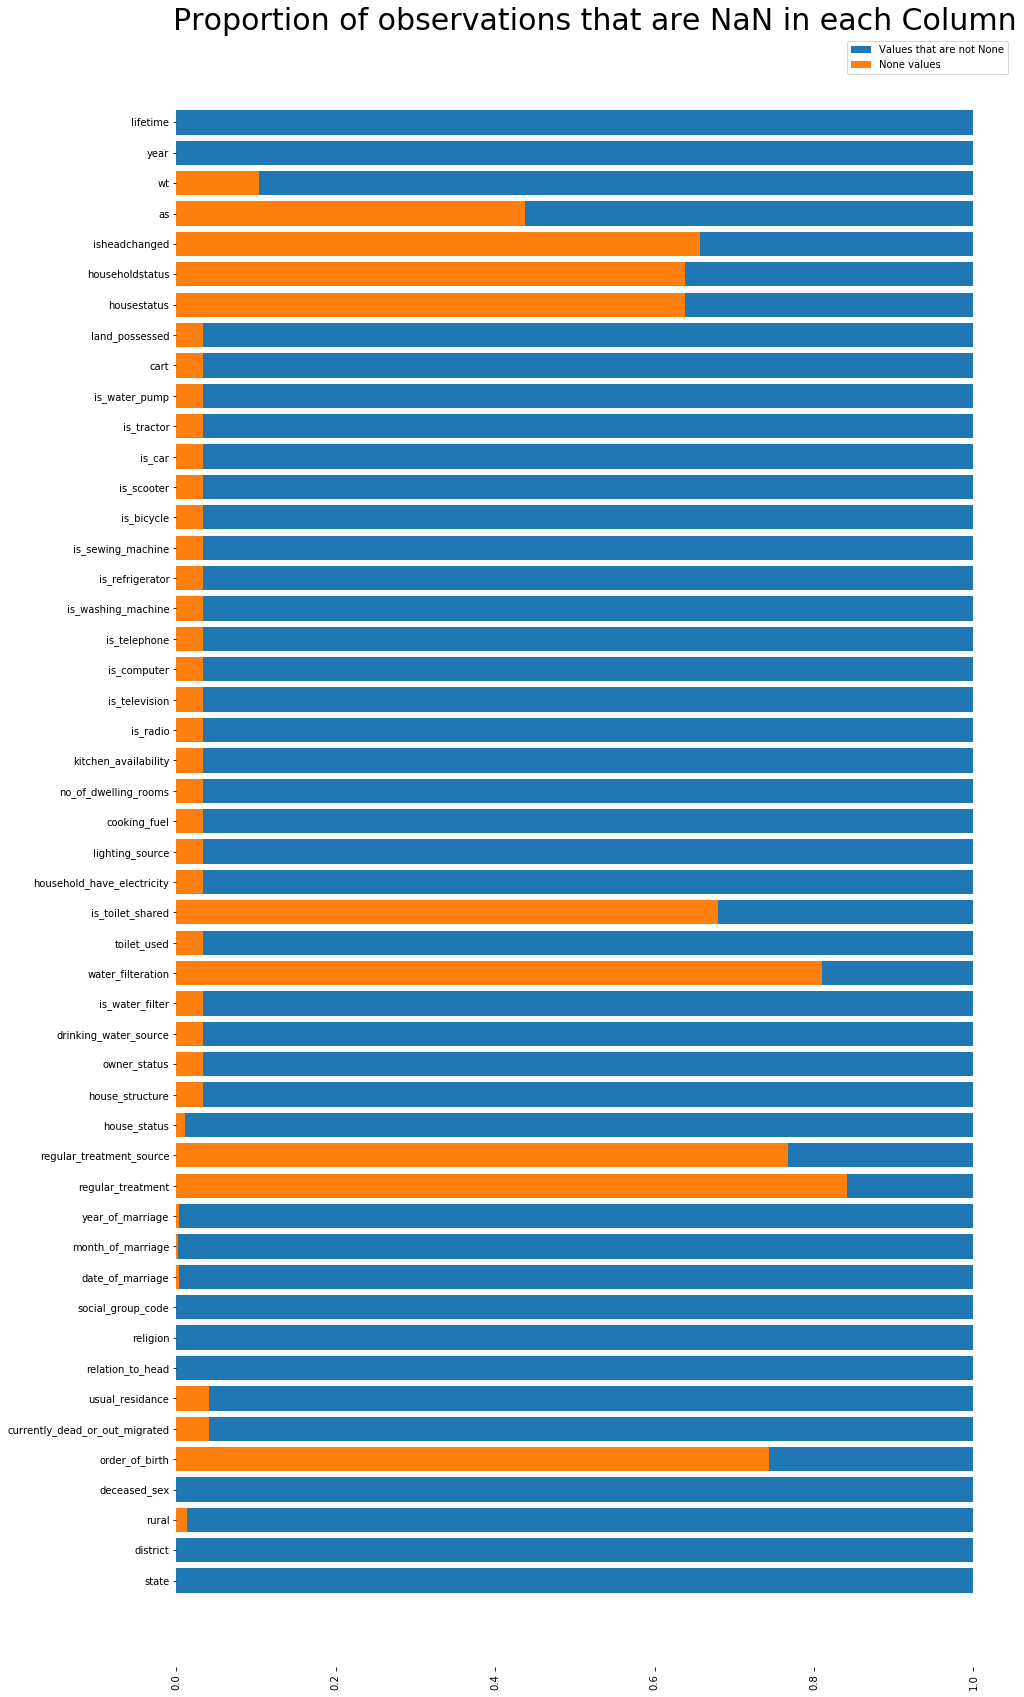

In [52]:
nan_plot(indians2)

## Continuing dealing with None values

**For finding out how best to deal with the remaining Nan values, I need to find out how they are distributed among rows. Thus, I'll make a histogram about it.**

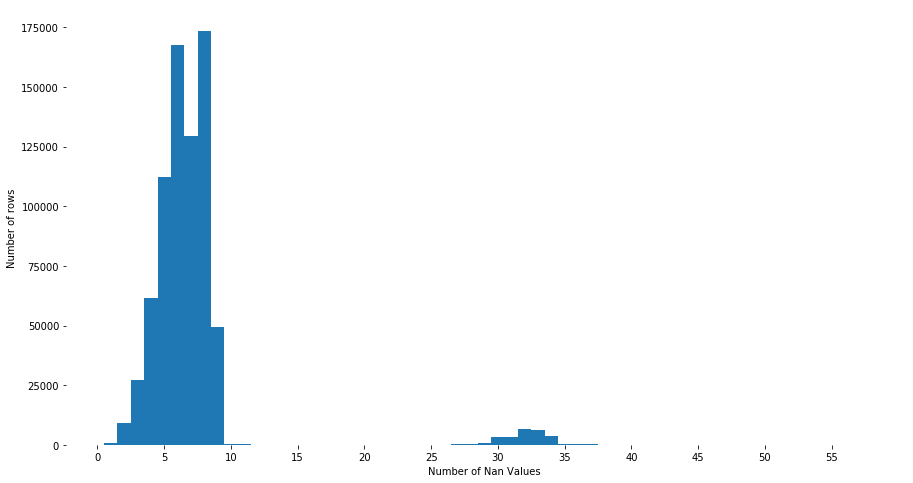

In [53]:
def nan_hist(df):
    nans = df == -1
    nan_nr_for_each_row = nans.apply(sum,axis=1)
    plt.figure(figsize=(15,8))
    plt.hist(nan_nr_for_each_row, bins=np.arange(0.5,58,1))
    sns.despine(bottom=True, left=True)
    plt.ylabel('Number of rows')
    plt.xlabel('Number of Nan Values')
    plt.xticks(np.arange(0,56,5))
    
nan_hist(indians2)

**It turns out that the majority of Nan values are distributed among rows that have less than 15 None Values. Let's see how this distribution changes when we remove all columns with a substantial amount of Nan values.**

In [54]:
indians2 = indians2.drop(['order_of_birth','regular_treatment','regular_treatment_source','water_filteration',\
                          'is_toilet_shared','housestatus','householdstatus','isheadchanged','as','wt'],axis=1)

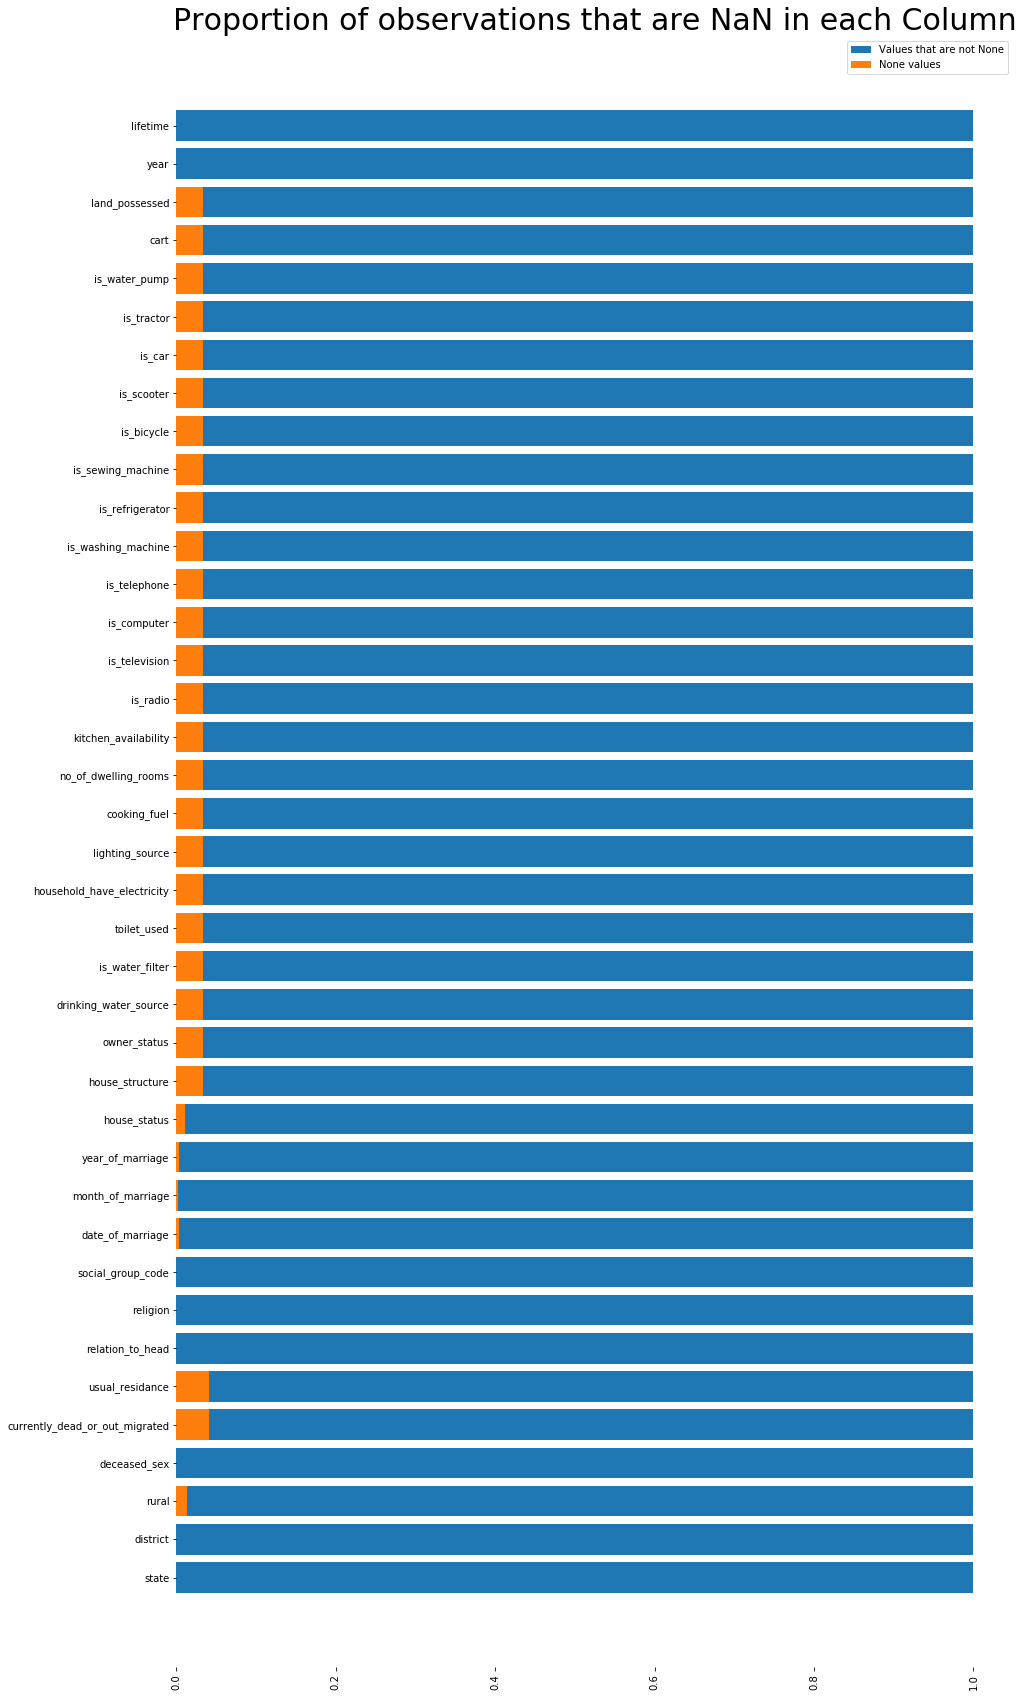

In [55]:
nan_plot(indians2)

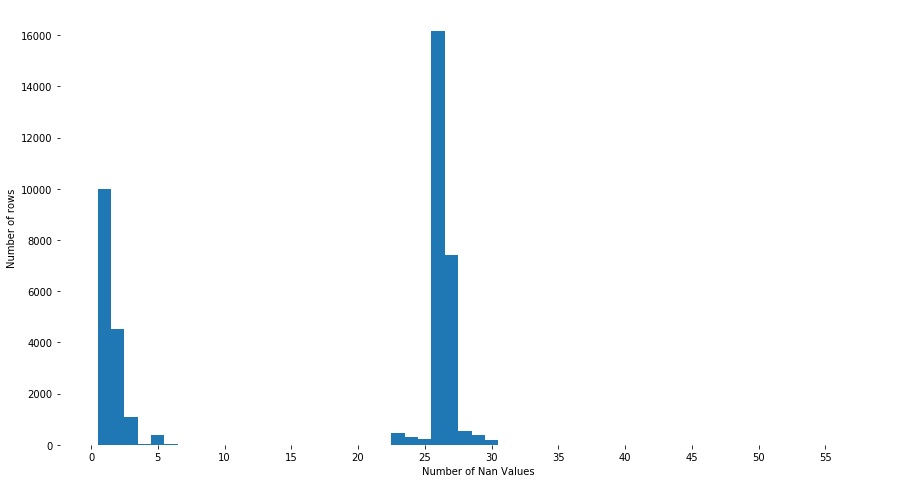

In [56]:
nan_hist(indians2)

**Now, the majority of all None values are in rows with more than 22 None values. Thus we will probably not lose that many rows if we drop all rows that have at least one nan value.**

In [57]:
indians2.shape

(757268, 39)

In [58]:
nan_mask = indians2 == -1

In [59]:
indians2[nan_mask.apply(sum, axis=1) == 0].shape

(715553, 39)

In [60]:
indians2 = indians2[nan_mask.apply(sum, axis=1) == 0]

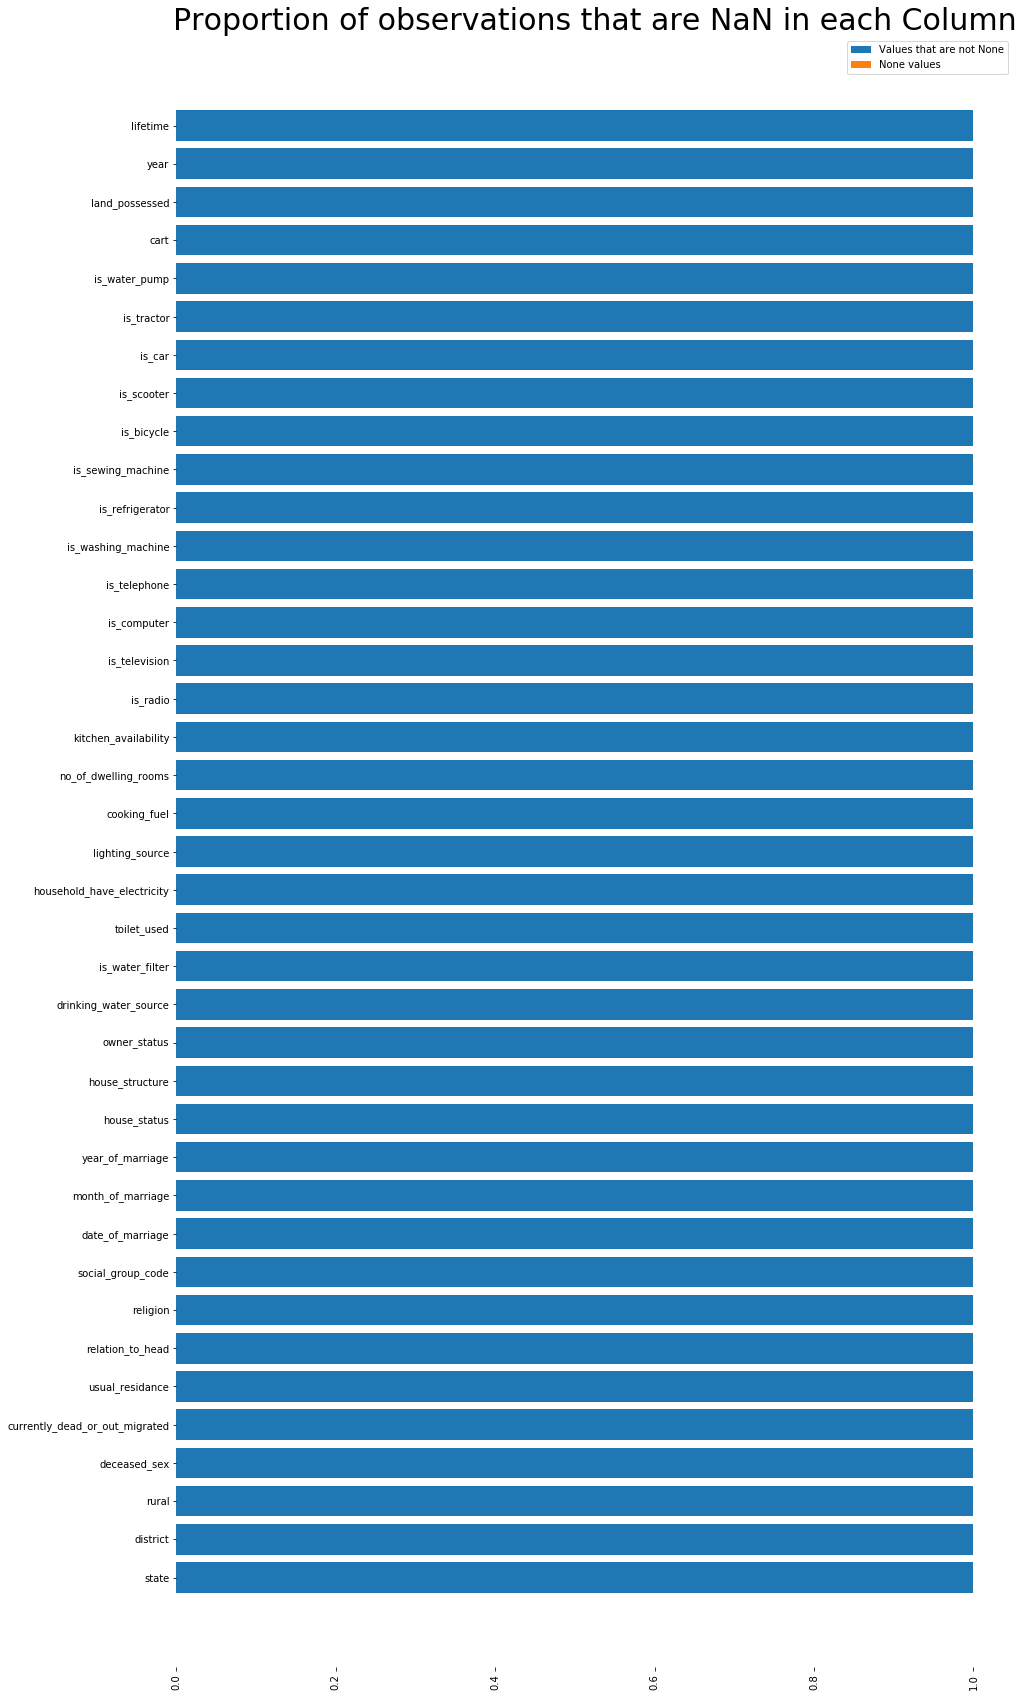

In [61]:
nan_plot(indians2)

**During the process of EDA I came to the conclusion that only features related to the households of the deceased can be used -  not those related to the individual deceased themselves. Thus I'll delete all such columns:**


In [62]:
indians2.relation_to_head

0         1
1         1
2         1
3         1
4         1
5         1
8         1
9         1
10        1
11        1
12        1
15        1
16        1
17        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
35        1
36        1
37        1
38        1
39        1
41        1
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
50        1
52        1
53        1
54        1
55        1
58        1
59        1
60        1
61        1
62        1
63        1
64        1
66        1
67        1
68        1
70        1
71        1
73        1
74        1
75        1
76        1
77        1
80        1
81        1
82        1
83        1
84        1
85        1
86        1
87        1
88        1
89        1
90        1
91        1
92        1
93        1
94        1
96        1
97        1
98        1
99  

In [63]:
indians2 = indians2.drop(['year_of_marriage','month_of_marriage','date_of_marriage','relation_to_head','currently_dead_or_out_migrated','deceased_sex'], axis=1)

In [64]:
indians2.head()


,state,district,rural,usual_residance,religion,social_group_code,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,year,lifetime
0,9,58,1,1,1,3,1,1,1,3,2,0,1,1,3,2,4,2,2,3,2,2,2,2,1,2,2,2,1,4,2,1,43.000000
1,9,58,1,1,1,3,1,1,1,3,2,0,2,2,2,2,2,2,2,3,4,2,2,2,2,2,2,2,1,4,2,1,70.000000
2,9,62,1,1,1,1,1,1,1,3,2,0,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,3,56.648767
3,9,58,1,1,1,3,1,1,1,3,2,0,2,2,3,3,1,2,2,3,4,2,2,2,1,2,2,2,2,4,2,1,50.000000
4,9,58,1,1,1,3,1,1,1,3,2,0,2,2,2,1,4,2,2,3,2,2,2,2,1,2,2,2,2,4,2,1,65.000000


## Turning integer encoded categorical values to more informative strings

**The values of most columns are not very human-readable right now - they are integer values corresponding to categories. Strings would be far more informative. In order to change the categorical integers to more informative strings I will use the information from a file describing the various variables.**

In [65]:
info = pd.read_excel('Mortality_data_dictionary.xlsx', sheet_name='Mortality',header=1)
info

,Field Order,Field Name,Field Descriptions,Codes Used,Schedule Code,Col. Nos,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,Baseline,First Updation,Second Updation
1,1,Id,NaN,NaN,NaN,NaN,NaN,NaN
2,2,m_id,NaN,NaN,NaN,NaN,NaN,NaN
3,3,client_m_id,NaN,NaN,NaN,NaN,NaN,NaN
4,4,hl_id,NaN,NaN,NaN,NaN,NaN,NaN
5,5,house_no,House Number,None,M,2,2,2
6,6,house_hold_no,Household Number,None,M,3,3,3
7,7,state,State,"Uttarakhand-05, \nRajasthan-08, \nUttar Prades...",M,Top of Schedule,Top of Schedule,Top of Schedule
8,8,district,District,"code 01-13 when [state code] = 05,\ncode 01-32...",M,Top of Schedule,Top of Schedule,Top of Schedule
9,9,rural,Rural/Urban,"Rural-1, Urban-2",M,Top of Schedule,Top of Schedule,Top of Schedule


In [66]:
info = info.set_index('Field Name')

In [67]:
info = info['Codes Used']

In [91]:
convert_dict = {}
for i in indians2.columns:
    if i in info.index:
        convert_dict[i] = info[i]
    else:
        convert_dict[i] = 'Nothing'

In [93]:
for key in convert_dict:
    if convert_dict[key] != 'Nothing' and isinstance(convert_dict[key],str):
        convert_dict[key] = convert_dict[key].split(',')
        convert_dict[key] = [string.strip().replace('=','-').split('-') for string in convert_dict[key]]
        
delete = []
for key in convert_dict:
    if convert_dict[key] == 'Nothing' or convert_dict[key] == [['None']]:
        delete.append(key)

for val in delete:
    del convert_dict[val]
    
del convert_dict['district']

In [94]:
convert_dict

{'state': [['Uttarakhand', '05'],
  ['Rajasthan', '08'],
  ['Uttar Pradesh', '09'],
  ['Bihar', '10'],
  ['Assam', '18'],
  ['Jharkhand', '20'],
  ['Odisha', '21'],
  ['Chhattisgarh', '22'],
  ['Madhya Pradesh', '23']],
 'rural': [['Rural', '1'], ['Urban', '2']],
 'usual_residance': [['Yes', '1'], ['No', '2']],
 'religion': [['Hindu', '1'],
  ['Muslim', '2'],
  ['Christian', '3'],
  ['Sikh', '4'],
  ['Buddhist', '5'],
  ['Jain', '6'],
  ['Others', '7'],
  ['No religion', '8']],
 'social_group_code': [['SC', '1'], ['ST', '2'], ['Others', '3']],
 'house_structure': [['Pucca ', '1'],
  ['Semi Pucca ', '2'],
  ['Kuccha ', '3'],
  ['Others ', '4']],
 'owner_status': [['Owned', '1'], ['Rented', '2'], ['Others', '3']],
 'drinking_water_source': [['Piped water into dwelling/yard/plot', '1'],
  ['Public tap/standpipe', '2'],
  ['Hand pump', '3'],
  ['Tube well or Borehole ', '4'],
  ['Protected dug well', '5'],
  ['Unprotected dug well', '6'],
  ['Tanker /truck/Cart with Surface watersmall tank

In [70]:
convert_dict['house_status'][2] = ['Vacant','3']
convert_dict['house_status'].append(['New House','4'])
convert_dict['toilet_used'][8] = ['open defecation','0']
del convert_dict['toilet_used'][9]
del convert_dict['toilet_used'][9]
del convert_dict['toilet_used'][9]

In [71]:
for key in convert_dict:
    in_dict = {}
    if isinstance(convert_dict[key],list):
        for sublist in convert_dict[key]:
            in_dict[int(sublist[-1])] = sublist[0]
            if len(sublist) > 2:
                for i in range(1,len(sublist)-1):
                    in_dict[int(sublist[-1])] += '_'+ sublist[i]
        convert_dict[key] = in_dict

In [72]:
convert_dict

{'state': {5: 'Uttarakhand',
  8: 'Rajasthan',
  9: 'Uttar Pradesh',
  10: 'Bihar',
  18: 'Assam',
  20: 'Jharkhand',
  21: 'Odisha',
  22: 'Chhattisgarh',
  23: 'Madhya Pradesh'},
 'rural': {1: 'Rural', 2: 'Urban'},
 'usual_residance': {1: 'Yes', 2: 'No'},
 'religion': {1: 'Hindu',
  2: 'Muslim',
  3: 'Christian',
  4: 'Sikh',
  5: 'Buddhist',
  6: 'Jain',
  7: 'Others',
  8: 'No religion'},
 'social_group_code': {1: 'SC', 2: 'ST', 3: 'Others'},
 'house_status': {1: 'Residential/partly residential ',
  2: 'Non_residential',
  3: 'Vacant',
  4: 'New House'},
 'house_structure': {1: 'Pucca ',
  2: 'Semi Pucca ',
  3: 'Kuccha ',
  4: 'Others '},
 'owner_status': {1: 'Owned', 2: 'Rented', 3: 'Others'},
 'drinking_water_source': {1: 'Piped water into dwelling/yard/plot',
  2: 'Public tap/standpipe',
  3: 'Hand pump',
  4: 'Tube well or Borehole ',
  5: 'Protected dug well',
  6: 'Unprotected dug well',
  7: 'Tanker /truck/Cart with Surface watersmall tank',
  8: 'Surface water',
  9: 'othe

In [73]:
indians2.head()

,state,district,rural,usual_residance,religion,social_group_code,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,year,lifetime
0,9,58,1,1,1,3,1,1,1,3,2,0,1,1,3,2,4,2,2,3,2,2,2,2,1,2,2,2,1,4,2,1,43.000000
1,9,58,1,1,1,3,1,1,1,3,2,0,2,2,2,2,2,2,2,3,4,2,2,2,2,2,2,2,1,4,2,1,70.000000
2,9,62,1,1,1,1,1,1,1,3,2,0,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,3,56.648767
3,9,58,1,1,1,3,1,1,1,3,2,0,2,2,3,3,1,2,2,3,4,2,2,2,1,2,2,2,2,4,2,1,50.000000
4,9,58,1,1,1,3,1,1,1,3,2,0,2,2,2,1,4,2,2,3,2,2,2,2,1,2,2,2,2,4,2,1,65.000000


In [74]:
for colname in indians2.columns:
    indians2[colname] = pd.to_numeric(indians2[colname])

In [75]:
for key in convert_dict:
    indians2[key] = indians2[key].replace(convert_dict[key])

In [76]:
indians2.head()

,state,district,rural,usual_residance,religion,social_group_code,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,year,lifetime
0,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Electricity,Cow dung cake,2.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,Yes,Doesn't have,0.02 to less than 1.00,1,43.000000
1,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Crop Residue,2.0,Does not have kitchen,No,No,No,No,No,No,No,No,No,No,No,Yes,Doesn't have,0.02 to less than 1.00,1,70.000000
2,Uttar Pradesh,62,Rural,Yes,Hindu,SC,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,4.0,Does not have kitchen,Yes,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,3,56.648767
3,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Cow dung cake,3.0,Cooking inside the house:Has kitchen,No,No,No,No,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,1,50.000000
4,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Crop Residue,1.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,1,65.000000


## Droping redundant columns

**We can drop the the year column as it's redundand due to the new 'lifetime' column.**

In [77]:
indians2 = indians2.drop('year', axis=1)

In [78]:
for col in indians2.columns:
    print(col + ':\n' )
    print(indians2[col].unique())
    print('\n\n')
    

state:

['Uttar Pradesh' 'Odisha' 'Jharkhand' 'Madhya Pradesh' 'Chhattisgarh'
 'Bihar' 'Assam' 'Rajasthan' 'Uttarakhand']



district:

[58 62 57 15 34 33 69 22  1 68  5 32 21  2 50 37 70 67  4 46 41 40  3 65
 30  6  7 13 64  9 66 18 59 56 43 61 31 27 23 63 36 35 25 38 53 42 29 60
 26 49 28 39 48 24 45 44 54 55 52 14 10 16 17 11 51 19 47 12  8 20]



rural:

['Rural' 'Urban']



usual_residance:

['Yes' 'No']



religion:

['Hindu' 'Muslim' 'Sikh' 'Christian' 'Buddhist' 'Jain' 'Others'
 'No religion']



social_group_code:

['Others' 'SC' 'ST']



house_status:

['Residential/partly residential ' 'Vacant' 'Non_residential']



house_structure:

['Pucca ' 'Kuccha ' 'Semi Pucca ' 'Others ']



owner_status:

['Owned' 'Others' 'Rented']



drinking_water_source:

['Hand pump' 'Piped water into dwelling/yard/plot'
 'Tube well or Borehole ' 'Public tap/standpipe' 'other sources'
 'Protected dug well' 'Unprotected dug well' 'Surface water'
 'Tanker /truck/Cart with Surface watersmall tank']


In [79]:
indians2 = indians2.replace({'toilet_used':{'9.0':'community toilet'}})

In [80]:
indians2.toilet_used.value_counts()

open defecation                                                          476321
To septic tank                                                           116329
To pit latrine                                                            40797
Pit latrine with slab                                                     25132
Open pit /Pit latrine without slab                                        24489
Flush/Pour flush latrine connected:_To piped sewer system                 19850
Pit latrine(without flush/ pour flush):_Ventilated Improved Pit (VIP)      6128
To somewhere else                                                          2890
service latrine                                                            1815
9.0                                                                        1802
Name: toilet_used, dtype: int64

**During the training process it turned out the usual_residance column is not useful, because almost all values are the same. For the same reason I'll delete 'house_status'. Furthermore I'll delete all rows where lifetime is null. There are only two such rows and 0 values can make some operations impossible (for example one can't take the log of 0).**

In [81]:
indians2.drop('usual_residance', axis=1)

,state,district,rural,religion,social_group_code,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,lifetime
0,Uttar Pradesh,58,Rural,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Electricity,Cow dung cake,2.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,Yes,Doesn't have,0.02 to less than 1.00,43.000000
1,Uttar Pradesh,58,Rural,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Crop Residue,2.0,Does not have kitchen,No,No,No,No,No,No,No,No,No,No,No,Yes,Doesn't have,0.02 to less than 1.00,70.000000
2,Uttar Pradesh,62,Rural,Hindu,SC,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,4.0,Does not have kitchen,Yes,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,56.648767
3,Uttar Pradesh,58,Rural,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Cow dung cake,3.0,Cooking inside the house:Has kitchen,No,No,No,No,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,50.000000
4,Uttar Pradesh,58,Rural,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Crop Residue,1.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,65.000000
5,Uttar Pradesh,62,Rural,Hindu,SC,Residential/partly residential,Kuccha,Owned,Hand pump,No,open defecation,No,Kerosene,Cow dung cake,1.0,Does not have kitchen,No,No,No,No,No,No,No,No,No,No,No,No,Doesn't have,Less than 0.02,67.000000
8,Uttar Pradesh,58,Rural,Hindu,Others,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,1.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,50.000000
9,Uttar Pradesh,58,Rural,Hindu,SC,Residential/partly residential,Pucca,Owned,Hand pump,No,To septic tank,Yes,Kerosene,Cow dung cake,4.0,Cooking inside the house:Has kitchen,Yes,Yes,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,46.000000
10,Uttar Pradesh,62,Rural,Hindu,SC,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,2.0,Does not have kitchen,No,No,No,No,No,No,No,Yes,No,No,No,No,Doesn't have,Less than 0.02,44.000000
11,Uttar Pradesh,58,Rural,Hindu,SC,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,LPG/PNG,2.0,Does not have kitchen,No,No,No,No,No,No,No,No,No,No,No,No,Doesn't have,0.02 to less than 1.00,52.000000


In [82]:
indians2 = indians2.drop('house_status', axis=1)

In [83]:
indians2 = indians2[indians2.lifetime != 0]

In [84]:
indians2.to_csv('indians.csv')

In [85]:
indians2.head()


,state,district,rural,usual_residance,religion,social_group_code,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,lifetime
0,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Pucca,Owned,Hand pump,No,open defecation,Yes,Electricity,Cow dung cake,2.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,Yes,Doesn't have,0.02 to less than 1.00,43.000000
1,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Crop Residue,2.0,Does not have kitchen,No,No,No,No,No,No,No,No,No,No,No,Yes,Doesn't have,0.02 to less than 1.00,70.000000
2,Uttar Pradesh,62,Rural,Yes,Hindu,SC,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,4.0,Does not have kitchen,Yes,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,56.648767
3,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Cow dung cake,3.0,Cooking inside the house:Has kitchen,No,No,No,No,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,50.000000
4,Uttar Pradesh,58,Rural,Yes,Hindu,Others,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Crop Residue,1.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,65.000000


## Creating training and test sets and exporting them to pickle file

In [86]:
X_train, X_test, y_train, y_test = train_test_split(indians2.drop('lifetime', axis=1), indians2.lifetime, test_size=0.33, random_state=74)

In [87]:
with open('indians.pickle', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [90]:
with open('indians_itself.pickle', 'wb') as f:
    pickle.dump(indians, f)